## Imports

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re

sns.set(color_codes=True)

## Extract Coco Trees

In [7]:
coco_trees = []
    
tree_data = pd.read_json('../data/tree_coconuts/trees.json')
data = tree_data['features']

coco = re.compile(r'"(\w+)"=>"(\w+)","(\w+)"=>"(\w+)"')

# extract coconut trees
for record in data:
    properties = record['properties']
    geomtery = record['geometry']
    if (properties['other_tags']):
        tags = properties['other_tags'].split(',')
        for tree_tags in tags:
            trees = tree_tags.split('=>')
            if ((trees[0] == '"species"')|(trees[0] =='"genus"')):
                if(re.search('^"Cocos.', trees[1])):
                    # we found coco trees
                    coco_trees.append({"x": record['geometry']['coordinates'][0],\
                                  "y": record['geometry']['coordinates'][1]})

coco_trees = pd.DataFrame(coco_trees)

coco_trees.to_csv('../data/tree_coconuts/locations.json')

## Preliminary EDA

In [8]:
print("Number of labeled trees:", coco_trees.shape[0])

Number of labeled trees: 6849


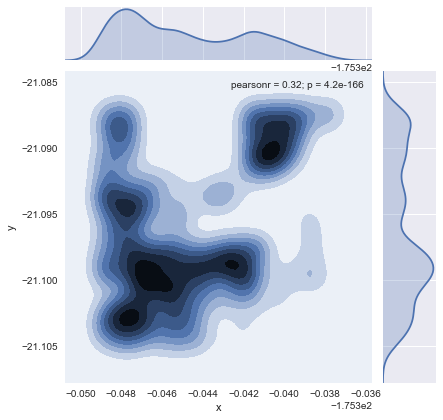

In [9]:
sns.jointplot(x="x", y="y", data=coco_trees, kind="kde")